# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [17]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [6]:
# Method 1
# your answer here
employee.groupby('Department').mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [9]:
# Method 2
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [11]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], columns = ['Title'], aggfunc = np.mean)

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [15]:
# your answer here
employee.pivot_table(index = ['Title'], values = ['Salary'], columns = ['Years'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [16]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], columns = ['Title'], aggfunc = {'Salary' : ('mean', 'count')})

Salary                                          
            count                    mean                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR            1.0     2.0       NaN  70.0    32.5       NaN
IT            1.0     2.0       1.0  70.0    32.5      60.0
Sales         NaN     NaN       2.0   NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [18]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], columns = ['Title'], aggfunc = {'Salary' : ('median', 'min', 'max', 'std')})

Salary                                                           \
              max                   median                     min           
Title          VP analyst associate     VP analyst associate    VP analyst   
Department                                                                   
HR           70.0    35.0       NaN   70.0    32.5       NaN  70.0    30.0   
IT           70.0    35.0      60.0   70.0    32.5      60.0  70.0    30.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0   NaN     NaN   

                                          
                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

- There's only one VP for both HR and IT  since the max and min are the same and there's not std.
- Analysts pay varies since min and max are not the same
- NaN for titles that don't exist in that department

#### Based on your comments, fill the missing values with an appropriate value.

In [19]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], columns = ['Title'], aggfunc = {'Salary' : ('median', 'min', 'max', 'std')}, fill_value = 0)

Salary                                                         \
              max                   median                   min           
Title          VP analyst associate     VP analyst associate  VP analyst   
Department                                                                 
HR             70      35         0     70    32.5         0  70      30   
IT             70      35        60     70    32.5        60  70      30   
Sales           0       0        55      0     0.0        55   0       0   

                                              
                     std                      
Title      associate  VP   analyst associate  
Department                                    
HR                 0   0  3.535534         0  
IT                60   0  3.535534         0  
Sales             55   0  0.000000         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [22]:
# your answer here
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [26]:
# your answer here
employee.pivot_table(index = ['Department'], columns = ['Title'], values = ['Salary', 'Years'], aggfunc = {'Salary' : np.mean, 'Years' : 'sum'})

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here
def nomax(col):
    m = employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = 'max')
    n = 
    new = [x for x in col if x != col.max()]
    return new

In [27]:
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = 'max')

,Salary
Department,
HR,70
IT,70
Sales,55


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [28]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [29]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [30]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [33]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

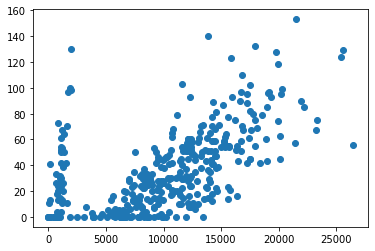

In [35]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Very Active'])


#### What can you say about Minute Very Active and Steps? Write a comment below

### your answer here
- The more steps the more minutes active they are for the most part, but there is a selection of people who are also very active without very many steps - most likely due to other forms of physical activities (ie. cycling, swimming, sports etc.)


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [36]:
# your answer here
fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

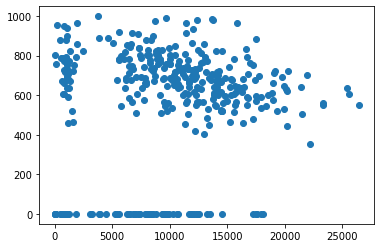

In [38]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['Minutes Sedentary'])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [39]:
# your answer here
fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

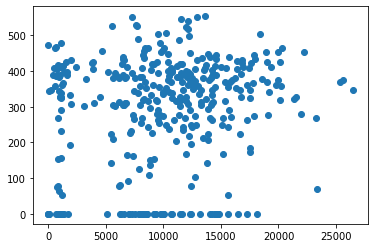

In [40]:
# your answer here
plt.scatter(x = fitbit['Steps'], y = fitbit['MinutesOfSleep'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [42]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


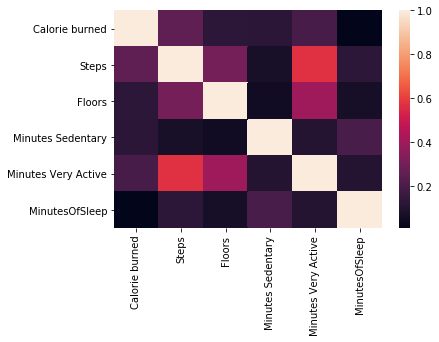

In [41]:
# your answer here
import seaborn as sns
corr = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit = sns.heatmap(corr)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

# your answer here
- Since this scale is only positive, the lighter it is the more strongly correltaed.
- Minutes Very Active is the most correlated with Steps in the above comparisons.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [44]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

(array([1., 1., 2., 1., 0., 1., 0., 4., 2., 3.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

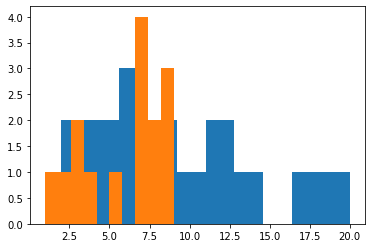

In [46]:
# your answer here
plt.hist(time_grades['Study time'])
plt.hist(time_grades['Grade'])

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [52]:
# your answer here

corr_p = time_grades['Study time'].corr(time_grades['Grade'])
corr_s = time_grades['Study time'].corr(time_grades['Grade'], method = "spearman")

print(corr_p)
print(corr_s)

0.7980456073578858
0.819658753036942


- Both metrics are around 80% indicating a strong postivie relationship between the two variables.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

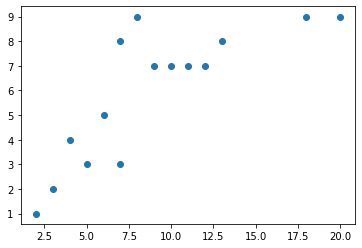

In [54]:
# your answer here
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

### your answer here
- Pearson correlation is 79.8% - This assumes the distribution is normal and is measuring linear relationship.
- Spearman correlation is 81.9% - This does not assume any type of distribution and takes into consideration that the variables can go move in the same direction but not at a constant rate. 
- For this above example, the Spearman may be a stronger indicator given the curved trend we can see in the scatterplot.